Bước 1: Tạo một notebook mới trên Google Colab và chọn runtime là Python 3.

Bước 2: Cài đặt thư viện python-sat bằng lệnh pip:

# Thư viện

In [ ]:
!pip install python-sat==0.1.7.dev12
!pip install pycosat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bước 3: Tạo file input.txt với định dạng như mô tả trong đề bài.

Bước 4: Khai báo thư viện, đọc dữ liệu từ file input.txt và lưu vào biến matrix:

# CNF

In [ ]:
import itertools
from pysat.solvers import Glucose3
from pysat.formula import CNF
import pycosat

In [ ]:
with open('/content/input.txt') as f:
    m, n = map(int, f.readline().split())
    # Đọc và xây dựng một ma trận gồm các số nguyên và None.
    grid = [list(map(lambda x: int(x) if x != '.' else None, f.readline().split())) for _ in range(m)]

In [ ]:
def get_variable_num(i, j, n):
    # ánh xạ giá trị của từng ô 
    return i * n + j + 1

def add_atmost(cnf, variables, k):
    # Thêm một clause vào công thức CNF để thực thi ràng buộc "at-most-k" đối với một nhóm biến.
    for combination in itertools.combinations(variables, k+1):
        clause = [-x for x in combination]
        cnf.append(clause)

In [ ]:
def solve_matrix(matrix):
    # Mã hoá dưới dạng công thức CNF và giải quyết nó bằng PicoSAT.
    # Hàm lấy một ma trận làm đầu vào, trong đó mỗi ô là một số nguyên hoặc None (đại diện cho một ô trống)
    # Và trả về một ma trận các giá trị Boolean đại diện cho giải pháp.
    cnf = []
    # Duyệt qua các phần tử trong ma trận và là số nguyên
    for i in range(m):
        for j in range(n):
            if matrix[i][j] is not None:
                # Tập hợp các ô neighbors là các ô ở vị trí kề cạnh hoặc đường chéo với ô hiện tại và không phải là những ô trống.
                neighbors = [(i+di, j+dj) for di, dj in itertools.product([-1, 0, 1], repeat=2)
                             if 0 <= (i+di) < m and 0 <= (j+dj) < n and matrix[i+di][j+dj] != '.']
                # tạo ra các biến Boolean tương ứng với các ô láng giềng bằng cách sử dụng hàm get_variable_num(ni, nj, n).
                green_vars = [get_variable_num(ni, nj, n)
                              for ni, nj in neighbors]
                # Đảm bảo không có quá nhiều ô neighbors được chọn.
                # k là số ô được chọn cho ô hiện tại, và danh sách green_vars chính là tập hợp các biến Boolean đã được tạo ra cho các ô láng giềng.
                add_atmost(cnf, green_vars, matrix[i][j])
                # Đảm bảo không có quá ít ô láng giềng được chọn
                # k là số ô được bỏ qua cho ô hiện tại, và danh sách biến green_vars là tập hợp các biến Boolean đã được tạo ra cho các ô láng giềng
                # Lấy phủ đối của danh sách biến green_vars bằng cách đảo
                add_atmost(cnf, [-x for x in green_vars],
                           len(green_vars) - matrix[i][j])

    # Trả về một giải pháp nếu nó tồn tại ở dạng danh sách các số nguyên đại diện cho các phép gán biến làm cho công thức trở thành đúng.
    solution = pycosat.solve(cnf)

    if solution != "UNSAT":
        # Tạo kết quả danh sách kích thước m x ​​n với giá trị ban đầu là None.
        result = [[None] * n for _ in range(m)]
        # Sau đó, lặp lại từng phần tử trong kết quả và kiểm tra xem biến tương ứng có được gán True trong giải pháp hay không.
        # Nếu đúng->  True, nếu không->  False. Danh sách kết quả kết quả được trả về.
        for i in range(m):
            for j in range(n):
                var_num = get_variable_num(i, j, n)
                if var_num in solution:
                    result[i][j] = True
                else:
                    result[i][j] = False
        return result
    else:
        return None


# Trả về True -> Xanh, False-> Đỏ

In [ ]:
output = solve_matrix(grid)
print(output)

[[False, True, True, False, False, False, False, False, True, True], [False, False, False, True, False, False, False, True, True, True], [False, False, True, True, True, False, False, True, True, True], [False, True, True, False, True, True, False, True, False, False], [False, True, False, False, False, True, True, True, True, False], [True, True, False, False, True, True, False, False, True, True], [True, False, False, False, True, False, False, False, False, True], [True, False, False, False, True, False, False, False, False, True], [True, True, False, False, True, True, False, False, True, True], [False, True, True, True, True, True, True, True, True, False]]


Biểu diễn ma trận đã tô màu dưới dạng hình ảnh

# Plot

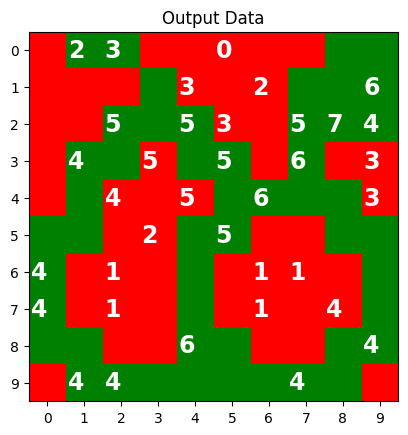

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])
fig, ax = plt.subplots()
ax.imshow(output, cmap=cmap)

ax.set_title('Output Data')

for i in range(len(grid)):
    for j in range(len(grid[0])):
        if grid[j][i] is not None:
            ax.text(i, j, str(grid[j][i]), color='w', fontsize=17, fontweight='bold', ha='right', va='center')

plt.show()